In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip

# Setting visualization style
sns.set_style("whitegrid")

In [2]:
# 1. Married Women by Age
df_married = pd.read_csv('Marriedwomen.csv')

# 2. Sexually Active Unmarried Women by Age
df_unmarried = pd.read_csv('Unmarried.csv')

# 3. Contraceptive Use by County
df_county = pd.read_csv('Countycontraceptive.csv', encoding='latin1')


print(df_married.head())


     Age  Female sterilization  IUD  Injectables  Implants  Pills  \
0  15-19                   0.0  1.3         12.8      17.1    1.3   
1  20-24                   0.1  1.3         20.1      20.6    6.9   
2  25-29                   0.2  3.2         23.1      22.2    8.4   
3  30-34                   1.3  5.3         20.4      21.2    9.3   
4  35-39                   2.4  6.4         21.2      17.5    9.5   

   Male condom  Emergency contraception  SDM  LAM  Withdrawal  \
0          3.7                      0.0  0.0  0.7         0.9   
1          2.0                      0.9  0.6  0.9         2.3   
2          1.4                      0.4  0.2  1.6         1.0   
3          1.7                      0.4  0.3  0.8         1.3   
4          1.4                      0.1  0.5  0.8         0.9   

   Not currenly using  Number of women  
0                59.3              456  
1                40.8             2635  
2                35.2             4055  
3                33.8         

In [3]:
df_unmarried.head()

Age  Female sterilization  IUD  Injectables  Implants  Pills  \
0  15-19                   0.0  0.0          6.0       3.0    3.2   
1  20-24                   0.0  0.0         14.1       8.5    3.4   
2  25-29                   0.0  4.2         18.6      18.2    3.2   
3  30-34                   0.0  5.8         21.5      16.1   13.6   
4  35-39                   3.2  6.0         23.6      13.3   10.4   

   Male condom  Emergency contraception  SDM  LAM  Withdrawal  \
0         27.3                      3.2  0.0    0         4.7   
1         30.6                      4.1  0.1    0         6.4   
2         13.3                      2.7  2.4    0         5.3   
3          7.8                      1.2  0.0    0         0.0   
4          8.2                      1.0  0.0    0         4.2   

   Not currenly using  Number of women  
0                41.6              120  
1                26.9              283  
2                26.8              146  
3                31.5              120  
4                17.9               97

In [4]:
df_county.head()
df_county.columns


Index(['County', 'Unnamed: 1', 'Any modern method', 'Female sterilization',
       'Male Sterilization', 'IUD', 'Injectables', 'Implants', 'Pills',
       'Male condom', 'Female condom', 'Emergency contraception', 'SDM', 'LAM',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Withdrawal',
       'Unnamed: 18', 'Not currently using', 'Unnamed: 20', 'Number of women'],
      dtype='object')

In [5]:
# Cleaning the dataframes

# Identifying the columns containing 'Unnamed'
columns_to_drop = [col for col in df_county.columns if 'Unnamed' in col]
df_county_clean = df_county.drop(columns=columns_to_drop, errors='ignore')

# Numeric
df_county_clean['Number of women'] = pd.to_numeric(df_county_clean['Number of women'], errors='coerce')

# Dropping any row where 'Number of women' is NaN 
df_county_clean = df_county_clean.dropna(subset=['Number of women']).copy()

df_county_clean



County  Any modern method  Female sterilization  \
0           Mombasa               42.1                   0.8   
1             Kwale               34.6                   0.8   
2            Kilifi               44.7                   1.6   
3        Tana River               23.2                   0.5   
4              Lamu               39.2                   0.5   
5      Taita/Taveta               64.5                   2.8   
6           Garissa               11.1                   1.4   
7             Wajir                2.8                   0.1   
8           Mandera                1.8                   0.0   
9          Marsabit                5.6                   0.4   
10           Isiolo               28.7                   0.8   
11             Meru               69.7                   0.7   
12    Tharaka-Nithi               67.9                   3.0   
13             Embu               75.2                   1.8   
14            Kitui               62.4                   1.2   
15         Machakos               66.4                   3.4   
16          Makueni               64.4                   4.4   
17        Nyandarua               66.7                   2.3   
18            Nyeri               70.5                   3.7   
19        Kirinyaga               70.8                   0.8   
20       Murangï¿½a               67.3                   1.4   
22          Turkana               30.7                   1.3   
23       West Pokot               23.2                   0.9   
24          Samburu               25.4                   0.3   
25      Trans Nzoia               65.4                   3.0   
26      Uasin Gishu               62.7                   1.5   
27  Elgeyo/Marakwet               59.0                   3.4   
28            Nandi               60.0                   1.6   
29          Baringo               47.7                   0.5   
30         Laikipia               64.5                   4.5   
31           Nakuru               66.6                   3.2   
32            Narok               52.2                   1.6   
33          Kajiado               57.3                   1.1   
34          Kericho               60.0                   2.8   
35            Bomet               57.8                   8.3   
36         Kakamega               63.4                   4.1   
37           Vihiga               60.1                   3.3   
38          Bungoma               63.7                   3.4   
39            Busia               55.4                   5.1   
40            Siaya               42.9                   2.2   
41           Kisumu               56.6                   0.7   
42         Homa Bay               54.3                   3.6   
43           Migori               54.7                   2.5   
44            Kisii               63.5                   3.2   
45          Nyamira               64.8                   5.3   
46     Nairobi City               56.2                   1.3   

    Male Sterilization   IUD  Injectables  Implants  Pills  Male condom  \
0                  0.0   3.7         16.6      14.3    3.8          1.7   
1                  0.0   2.8         18.2       9.6    2.3          0.3   
2                  0.0   2.1         17.4      17.8    3.7          0.1   
3                  0.0   1.0         13.1       5.1    1.1          0.5   
4                  0.4   1.1         13.7      10.5    5.6          1.1   
5                  0.0   4.2         29.3      15.4    7.3          1.8   
6                  0.0   0.2          4.3       3.5    1.1          0.1   
7                  0.0   0.2          0.9       0.8    0.8          0.0   
8                  0.0   0.0          0.6       0.2    0.3          0.0   
9                  0.0   0.0          2.5       2.6    0.1          0.0   
10                 0.0   1.4         15.8       4.4    5.1          0.7   
11                 0.0   3.3         31.3      22.9    9.7          0.1   
12                 0.0   4.5 

In [6]:
# 2. OBJECTIVE 2: Ranking counties bottom 6 and top 6

# Ensuring the CPR column is numeric
df_county_clean['Any modern method'] = pd.to_numeric(df_county_clean['Any modern method'], errors='coerce')

# Sorting the data by 'Any modern method' (CPR)
df_ranked = df_county_clean.sort_values(by='Any modern method', ascending=False).reset_index(drop=True)

# Now we select the top 6 and bottom 6 counties
top_6_counties = df_ranked.head(6)[['County', 'Any modern method']]
bottom_6_counties = df_ranked.tail(6)[['County', 'Any modern method']]

print("\n--- Top 6 Counties by Modern CPR ---")
print(top_6_counties)

print("\n--- Bottom 6 Counties by Modern CPR ---")
print(bottom_6_counties)


--- Top 6 Counties by Modern CPR ---
          County  Any modern method
0           Embu               75.2
1      Kirinyaga               70.8
2          Nyeri               70.5
3           Meru               69.7
4  Tharaka-Nithi               67.9
5     Murangï¿½a               67.3

--- Bottom 6 Counties by Modern CPR ---
        County  Any modern method
40  Tana River               23.2
41  West Pokot               23.2
42     Garissa               11.1
43    Marsabit                5.6
44       Wajir                2.8
45     Mandera                1.8


- Visualizing our data(Top 6 and bottom 6) counties

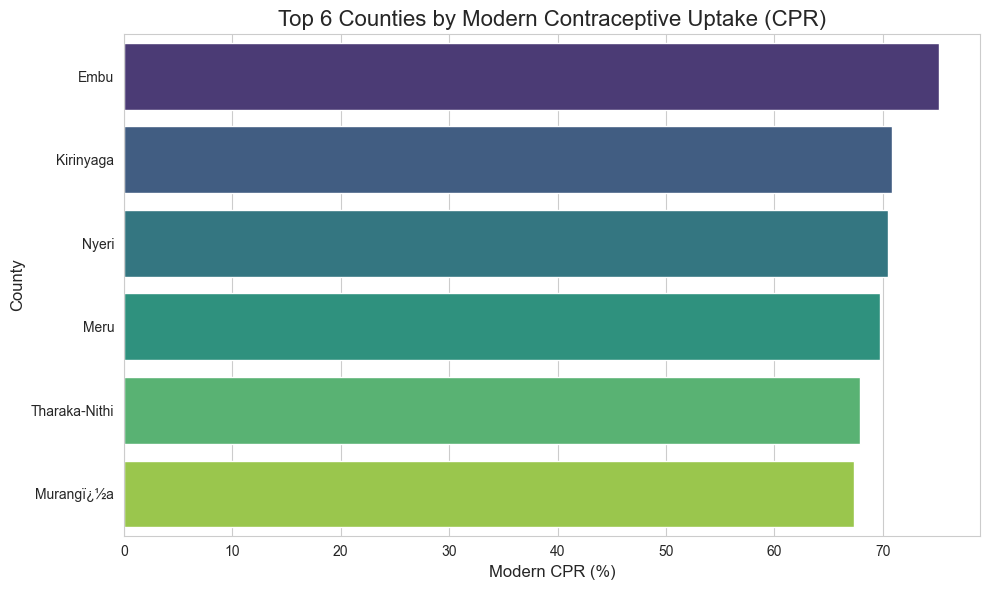


Visualization saved as 'top_6_counties_cpr.png'.


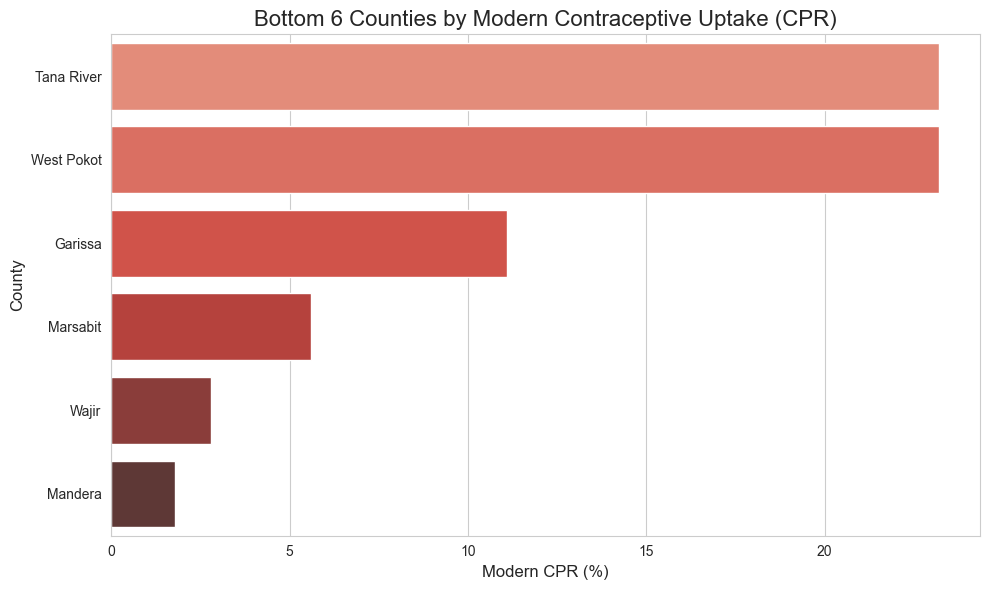

Visualization saved as 'bottom_6_counties_cpr.png'.
Data for interactive map feature saved as 'bottom_6_counties_data.csv'.


In [7]:
# Top 6 Counties
plt.figure(figsize=(10, 6))
sns.barplot(data=top_6_counties, 
            x='Any modern method', 
            y='County', 
            hue='County',
            palette='viridis',
            legend=False)
plt.title('Top 6 Counties by Modern Contraceptive Uptake (CPR)', fontsize=16)
plt.xlabel('Modern CPR (%)', fontsize=12)
plt.ylabel('County', fontsize=12)
plt.tight_layout()
plt.savefig('top_6_counties_cpr.png')
plt.show()
print("\nVisualization saved as 'top_6_counties_cpr.png'.")

# Bottom 6 Counties
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_6_counties, 
            x='Any modern method', 
            y='County', 
            hue='County',
            palette='Reds_d',
            legend=False)
plt.title('Bottom 6 Counties by Modern Contraceptive Uptake (CPR)', fontsize=16)
plt.xlabel('Modern CPR (%)', fontsize=12)
plt.ylabel('County', fontsize=12)
plt.tight_layout()
plt.savefig('bottom_6_counties_cpr.png')
plt.show()
print("Visualization saved as 'bottom_6_counties_cpr.png'.")

# Saving the bottom 6 data to CSV for the interactive map feature
bottom_6_counties.to_csv('bottom_6_counties_data.csv', index=False)
print("Data for interactive map feature saved as 'bottom_6_counties_data.csv'.")

- Objective 1 Comparative method mix by marital status
    - We'll calculate the weighted average usage for all contraceptive methods in both groups and then visualize the top 5 methods for comparison.

In [8]:
# List of all method columns
method_cols = [
    'Female sterilization', 'IUD', 'Injectables', 'Implants', 'Pills', 
    'Male condom', 'Emergency contraception', 'SDM', 'LAM', 'Withdrawal'
]

# Average for Married Women ---
total_married_women = df_married['Number of women'].sum()
married_mix_totals = (df_married[method_cols].multiply(df_married['Number of women'], axis=0)).sum()
married_weighted_avg = (married_mix_totals / total_married_women).sort_values(ascending=False)

# Average for Unmarried Women ---
total_unmarried_women = df_unmarried['Number of women'].sum()
unmarried_mix_totals = (df_unmarried[method_cols].multiply(df_unmarried['Number of women'], axis=0)).sum()
unmarried_weighted_avg = (unmarried_mix_totals / total_unmarried_women).sort_values(ascending=False)

# top 5 methods for each group for comparison
top_methods_married = married_weighted_avg.head(5)
top_methods_unmarried = unmarried_weighted_avg.head(5)

print("\n--- Objective 1: Top 5 Methods - Married Women (Weighted Average %) ---")
print(top_methods_married)

print("\n--- Objective 1: Top 5 Methods - Unmarried Women (Weighted Average %) ---")
print(top_methods_unmarried)


--- Objective 1: Top 5 Methods - Married Women (Weighted Average %) ---
Injectables             19.880057
Implants                18.533174
Pills                    8.158975
IUD                      4.449425
Female sterilization     2.331945
dtype: float64

--- Objective 1: Top 5 Methods - Unmarried Women (Weighted Average %) ---
Male condom    19.891364
Injectables    16.023295
Implants       11.269091
Pills           5.466591
Withdrawal      4.101364
dtype: float64


- Visualizing the comparison above

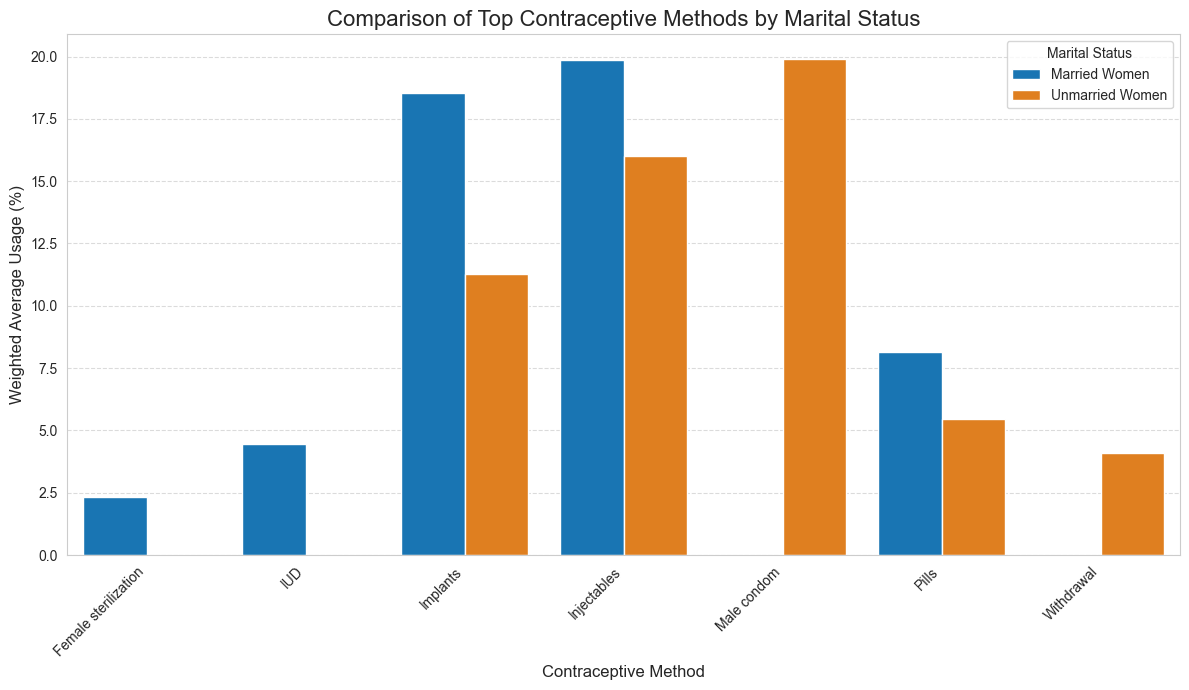


Visualization saved as 'marital_status_comparison.png'.


In [9]:
# 3. Combininig the top methods into one DataFrame for plotting
df_comparison = pd.DataFrame({
    'Married Women': top_methods_married,
    'Unmarried Women': top_methods_unmarried
}).fillna(0) 

df_comparison.index.name = 'Contraceptive Method'
df_comparison = df_comparison.reset_index()

# 4. Melting the DataFrame for Seaborn visualization (long format)
df_plot = df_comparison.melt(id_vars='Contraceptive Method', 
                              var_name='Marital Status', 
                              value_name='Weighted Average Usage (%)')

# 5. Visualization
plt.figure(figsize=(12, 7))
sns.barplot(data=df_plot, 
            x='Contraceptive Method', 
            y='Weighted Average Usage (%)', 
            hue='Marital Status', 
            palette=['#007ACC', '#FF7F00'])

plt.title('Comparison of Top Contraceptive Methods by Marital Status', fontsize=16)
plt.xlabel('Contraceptive Method', fontsize=12)
plt.ylabel('Weighted Average Usage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Marital Status')
plt.tight_layout()
plt.savefig('marital_status_comparison.png')
plt.show() 


print("\nVisualization saved as 'marital_status_comparison.png'.")

- Objective 3 - Overall national method mix
    - Top 3 methods used by both married and unmarried women

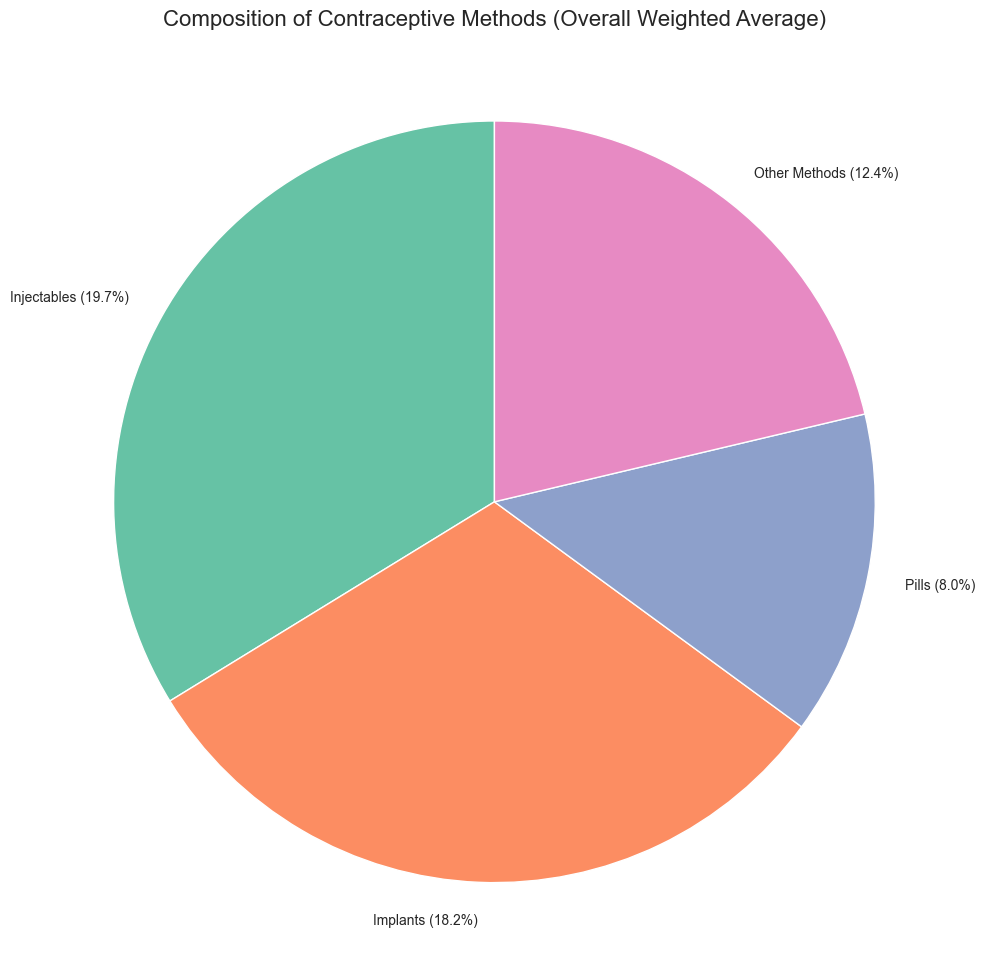


--- Objective 3: Overall Top 3 Contraceptive Methods (Weighted Average %) ---
Injectables    19.698572
Implants       18.191353
Pills           8.032282
dtype: float64

Visualization saved as 'overall_top_methods_pie.png'.


In [10]:
# 1. Defining the method columns 
method_cols = [
    'Female sterilization', 'IUD', 'Injectables', 'Implants', 'Pills', 
    'Male condom', 'Emergency contraception', 'SDM', 'LAM', 'Withdrawal'
]



# Combine and Finalize Overall Weighted Average
overall_mix_totals = married_mix_totals + unmarried_mix_totals
overall_total_women = df_married['Number of women'].sum() + df_unmarried['Number of women'].sum()
overall_weighted_avg = (overall_mix_totals / overall_total_women)

# top 3 methods
top_3_overall = overall_weighted_avg.sort_values(ascending=False).head(3)

# Grouping all other methods into an 'Other Methods' category for the pie chart
sum_top_3 = top_3_overall.sum()
other_methods_sum = overall_weighted_avg.sum() - sum_top_3
pie_data = pd.concat([top_3_overall, pd.Series([other_methods_sum], index=['Other Methods'])])

# VISUALIZing USING A PIE CHART
plt.figure(figsize=(10, 10))
plt.pie(pie_data, 
        
        labels=[f'{label} ({value:.1f}%)' for label, value in pie_data.items()],
        autopct='', 
        startangle=90,
        colors=plt.cm.Set2.colors)

plt.title('Composition of Contraceptive Methods (Overall Weighted Average)', fontsize=16)
plt.axis('equal') # Ensures the pie is circular
plt.tight_layout()
plt.savefig('overall_top_methods_pie.png')
plt.show() 


print("\n--- Objective 3: Overall Top 3 Contraceptive Methods (Weighted Average %) ---")
print(top_3_overall)
print("\nVisualization saved as 'overall_top_methods_pie.png'.")

In [11]:
# Defining normalize function again
def normalize_name(s):
    import pandas as pd
    if pd.isna(s):
        return ""
    return (
        str(s).strip()
        .lower()
        .replace("county", "")
        .replace(".", "")
        .replace("'", "")
        .replace("-", " ")
    )

# Loading the GeoJSON file 
gdf = gpd.read_file("ke.json")


In [12]:
# Joining
gdf["join_name"] = gdf["name"].apply(normalize_name)
df_ranked["join_name"] = df_ranked["County"].apply(normalize_name)

#  CPR column 
cpr_col = "Any modern method"

#  Merging data with the GeoDataFrame
merged = gdf.merge(df_ranked[["join_name", cpr_col, "County"]], on="join_name", how="left")

# base map centered on Kenya
m = folium.Map(location=[0.2, 37.5], zoom_start=6, tiles="cartodbpositron")

# Adding the choropleth layer
folium.Choropleth(
    geo_data=merged,
    data=merged,
    columns=["join_name", cpr_col],
    key_on="feature.properties.join_name",
    fill_color="YlGnBu",            # color palette
    fill_opacity=0.8,
    line_opacity=0.3,
    nan_fill_color="gray",           # color for missing data
    legend_name="Contraceptive Prevalence Rate (%) - Any Modern Method",
).add_to(m)

# hover tooltips to show county + CPR value
tooltip = GeoJsonTooltip(
    fields=["name", cpr_col],
    aliases=["County:", "CPR (%)"],
    localize=True,
    sticky=False,
    labels=True,
)

# Overlay tooltip on top of map
folium.GeoJson(
    merged,
    name="Counties",
    tooltip=tooltip,
    style_function=lambda x: {
        "color": "black",
        "weight": 0.4,
        "fillOpacity": 0,  # transparent fill (tooltip layer)
    },
).add_to(m)

# Save 
m.save("kenya_cpr_interactive.html")
m


- CPR change over time

In [13]:
# Creating a dataframe for CPR trends overtime
data = {
    'Year': [1993, 1998, 2003, 2008, 2014, 2022],
    'CPR (%)': [27.0, 32.0, 39.0, 46.0, 58.0, 63.0] 
}
df_cpr_trend = pd.DataFrame(data)
print(df_cpr_trend)



   Year  CPR (%)
0  1993     27.0
1  1998     32.0
2  2003     39.0
3  2008     46.0
4  2014     58.0
5  2022     63.0


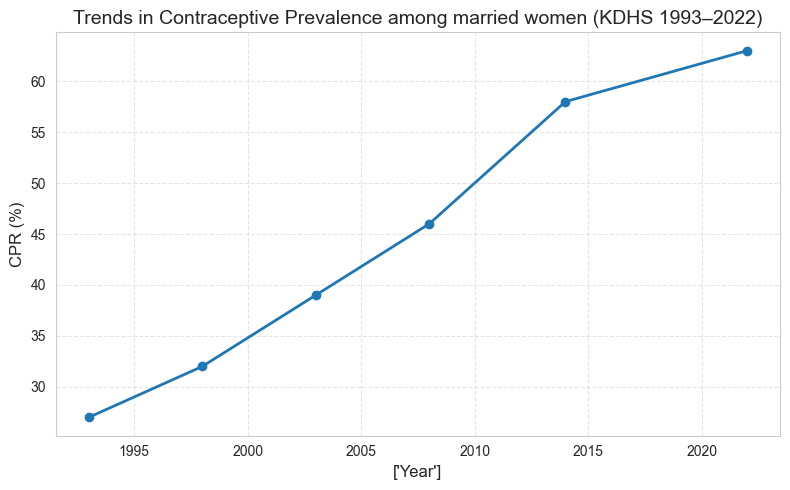

In [14]:
plt.figure(figsize=(8,5))
plt.plot(df_cpr_trend["Year"], df_cpr_trend["CPR (%)"], marker='o', linewidth=2)

plt.title("Trends in Contraceptive Prevalence among married women (KDHS 1993–2022)", fontsize=14)
plt.xlabel(["Year"], fontsize=12)
plt.ylabel("CPR (%)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig('Trends in contraceptive prevalence.png')
plt.show()


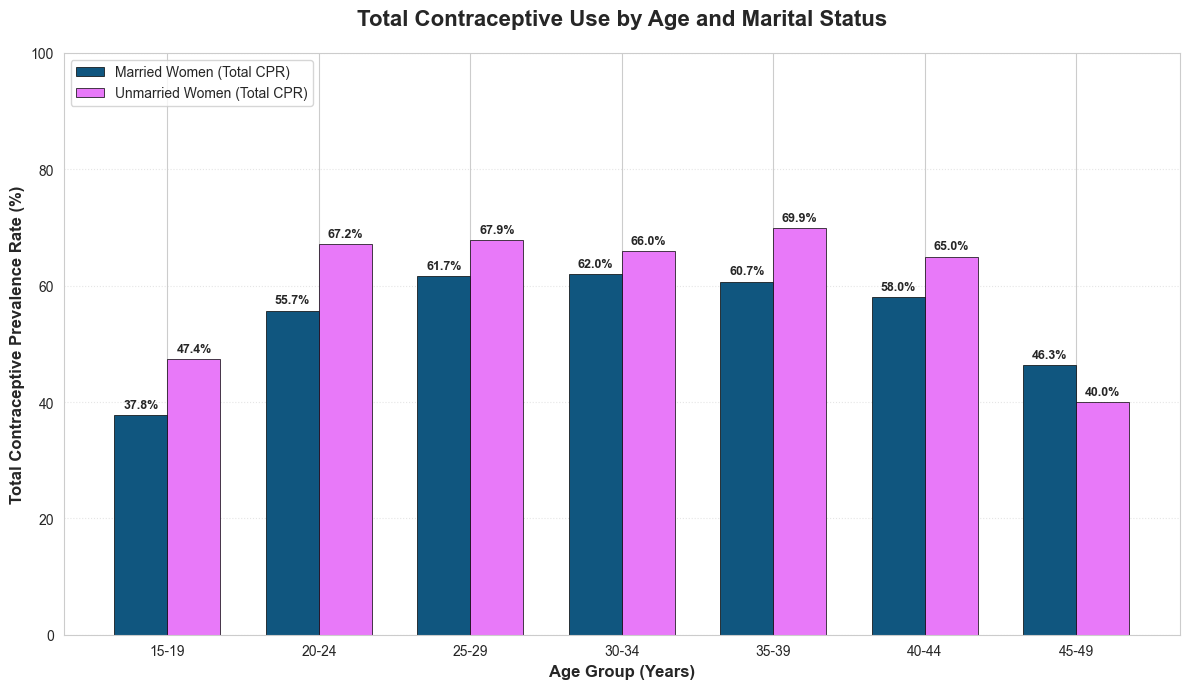

In [20]:
CONTRACEPTIVE_METHODS = [
    "Female sterilization", "IUD", "Injectables", "Implants", "Pills", 
    "Male condom", "Emergency contraception", "SDM", "LAM", "Withdrawal"
]

# --- 2. DATA PROCESSING AND CALCULATION (Improved) ---

def clean_and_calculate_use(df, methods):
    """Cleans columns and calculates the Total Contraceptive Prevalence Rate."""
    
    # 1. Clean the method columns: strip whitespace and convert to numeric
    for col in methods:
        if col in df.columns:
            # Strip whitespace, replace commas (if present), and then convert
            df[col] = df[col].astype(str).str.strip().str.replace(',', '').apply(pd.to_numeric, errors='coerce')
        else:
            print(f"Warning: Column '{col}' not found in DataFrame.")
            
    # 2. Calculate Total Contraceptive Use (sum of all method columns)
    # Use only columns that actually exist in the DataFrame
    existing_methods = [col for col in methods if col in df.columns]
    df['Total_Use'] = df[existing_methods].sum(axis=1)
    
    return df

df_married = clean_and_calculate_use(df_married, CONTRACEPTIVE_METHODS)
df_unmarried = clean_and_calculate_use(df_unmarried, CONTRACEPTIVE_METHODS)

# --- 3. PLOTTING THE DATA ---

# Prepare data for plotting
age_groups = df_married['Age'].tolist()
married_use = df_married['Total_Use'].tolist()
unmarried_use = df_unmarried['Total_Use'].tolist()

x = np.arange(len(age_groups))  # the label locations
width = 0.35  # the width of the bars

# Set figure size for better visibility
fig, ax = plt.subplots(figsize=(12, 7))

# Create the bars for Married Women (Darker Blue)
rects1 = ax.bar(x - width/2, married_use, width, 
                label='Married Women (Total CPR)', 
                color='#10567f', 
                edgecolor='black', 
                linewidth=0.5)

# Create the bars for Unmarried Women (Vibrant Pink)
rects2 = ax.bar(x + width/2, unmarried_use, width, 
                label='Unmarried Women (Total CPR)', 
                color='#e879f9',
                edgecolor='black', 
                linewidth=0.5)

# Add chart elements
ax.set_xlabel('Age Group (Years)', fontweight='bold', fontsize=12)
ax.set_ylabel('Total Contraceptive Prevalence Rate (%)', fontweight='bold', fontsize=12)
ax.set_title('Total Contraceptive Use by Age and Marital Status', fontsize=16, pad=20, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(age_groups, rotation=0) # Keep labels horizontal
ax.legend(loc='upper left', frameon=True, fontsize=10)
ax.grid(axis='y', linestyle=':', alpha=0.5)
ax.set_ylim(0, 100) # Ensure Y-axis is capped at 100%

# Function to attach a text label above each bar
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        # Only annotate if the value is not NaN and is relevant
        if not np.isnan(height) and height > 0:
            ax.annotate(f'{height:.1f}%',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=9,
                        fontweight='semibold')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('Contraceptives by age.png')
plt.show()